In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
# plt.rcParams['figure.dpi'] = 150
# plt.rcParams['savefig.dpi'] = 300

In [3]:
hd_20 = pd.read_csv("./data/Heart_Disease_Dataset/2020/heart_2020_cleaned.csv")
hd_22_nn = pd.read_csv("./data/Heart_Disease_Dataset/2022/heart_2022_no_nans.csv")
hd_22_wn = pd.read_csv("./data/Heart_Disease_Dataset/2022/heart_2022_with_nans.csv")

In [4]:
hd_22_nn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [5]:
hd_22_nn.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [6]:
hd_22_nn["HighRiskLastYear"].unique()

array(['No', 'Yes'], dtype=object)

In [7]:
hd_22_nn = hd_22_nn.drop("State", axis=1)

def expand_col(df, col_to_expand):
    for item in df[col_to_expand].unique():
        df[col_to_expand + "_" + item] = df[col_to_expand] == item
    return df.drop(col_to_expand, axis=1)

# def set_bool(col_to_set):
#     hd_22_nn[col_to_expand] = hd_22_nn[col_to_expand] == "Yes"

hd_22_nn = expand_col(hd_22_nn, "Sex")
hd_22_nn = expand_col(hd_22_nn, "GeneralHealth")
hd_22_nn = expand_col(hd_22_nn, "LastCheckupTime")
hd_22_nn = expand_col(hd_22_nn, "PhysicalActivities")
hd_22_nn = expand_col(hd_22_nn, "RemovedTeeth")
hd_22_nn = expand_col(hd_22_nn, "HadHeartAttack")
hd_22_nn = expand_col(hd_22_nn, "HadAngina")
hd_22_nn = expand_col(hd_22_nn, "HadStroke")
hd_22_nn = expand_col(hd_22_nn, "HadAsthma")
hd_22_nn = expand_col(hd_22_nn, "HadCOPD")
hd_22_nn = expand_col(hd_22_nn, "HadDepressiveDisorder")
hd_22_nn = expand_col(hd_22_nn, "HadKidneyDisease")
hd_22_nn = expand_col(hd_22_nn, "HadArthritis")
hd_22_nn = expand_col(hd_22_nn, "HadDiabetes")
hd_22_nn = expand_col(hd_22_nn, "DeafOrHardOfHearing")
hd_22_nn = expand_col(hd_22_nn, "BlindOrVisionDifficulty")
hd_22_nn = expand_col(hd_22_nn, "DifficultyConcentrating")
hd_22_nn = expand_col(hd_22_nn, "DifficultyWalking")
hd_22_nn = expand_col(hd_22_nn, "DifficultyDressingBathing")
hd_22_nn = expand_col(hd_22_nn, "DifficultyErrands")
hd_22_nn = expand_col(hd_22_nn, "SmokerStatus")
hd_22_nn = expand_col(hd_22_nn, "ECigaretteUsage")
hd_22_nn = expand_col(hd_22_nn, "ChestScan")
hd_22_nn = expand_col(hd_22_nn, "RaceEthnicityCategory")
hd_22_nn = expand_col(hd_22_nn, "AgeCategory")
hd_22_nn = expand_col(hd_22_nn, "AlcoholDrinkers")
hd_22_nn = expand_col(hd_22_nn, "HIVTesting")
hd_22_nn = expand_col(hd_22_nn, "FluVaxLast12")
hd_22_nn = expand_col(hd_22_nn, "PneumoVaxEver")
hd_22_nn = expand_col(hd_22_nn, "TetanusLast10Tdap")
hd_22_nn = expand_col(hd_22_nn, "HighRiskLastYear")
hd_22_nn = expand_col(hd_22_nn, "CovidPos")
hd_22_nn = expand_col(hd_22_nn, "HadSkinCancer")


# hd_20["HeartDisease"] = hd_20["HeartDisease"] == "Yes"
# hd_20["Smoking"] = hd_20["Smoking"] == "Yes"
# hd_20["AlcoholDrinking"] = hd_20["AlcoholDrinking"] == "Yes"
# hd_20["Stroke"] = hd_20["Stroke"] == "Yes"
# hd_20["DiffWalking"] = hd_20["DiffWalking"] == "Yes"
# hd_20["Sex"] = hd_20["Sex"].astype("category")
# hd_20["AgeCategory"] = hd_20["AgeCategory"].astype("category")
# hd_20["Race"] = hd_20["Race"].astype("category")
# hd_20["Diabetic"] = hd_20["Diabetic"].astype("category")
# hd_20["PhysicalActivity"] = hd_20["PhysicalActivity"] == "Yes"
# hd_20["GenHealth"] = hd_20["GenHealth"].map({
#     "Excellent": 5,
#     "Very good": 4,
#     "Good": 3,
#     "Fair": 2,
#     "Poor": 1,
# })

# hd_20["Asthma"] = hd_20["Asthma"] == "Yes"
# hd_20["KidneyDisease"] = hd_20["KidneyDisease"] == "Yes"
# hd_20["SkinCancer"] = hd_20["SkinCancer"] == "Yes"

In [8]:
hd_22_nn.select_dtypes(include='object')

""
0
1
2
3
4
...
246017
246018
246019
246020


In [9]:
for entry in hd_20["Sex"].unique():
    hd_20[entry] = hd_20["Sex"] == entry
hd_20 = hd_20.drop("Sex", axis=1)

In [10]:
for entry in hd_20["AgeCategory"].unique():
    hd_20[entry] = hd_20["AgeCategory"] == entry
hd_20 = hd_20.drop("AgeCategory", axis=1)

In [11]:
for entry in hd_20["Race"].unique():
    hd_20[entry] = hd_20["Race"] == entry
hd_20 = hd_20.drop("Race", axis=1)

In [12]:
for entry in hd_20["Diabetic"].unique():
    hd_20[entry] = hd_20["Diabetic"] == entry
hd_20 = hd_20.drop("Diabetic", axis=1)
hd_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 39 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   HeartDisease                    319795 non-null  object 
 1   BMI                             319795 non-null  float64
 2   Smoking                         319795 non-null  object 
 3   AlcoholDrinking                 319795 non-null  object 
 4   Stroke                          319795 non-null  object 
 5   PhysicalHealth                  319795 non-null  float64
 6   MentalHealth                    319795 non-null  float64
 7   DiffWalking                     319795 non-null  object 
 8   PhysicalActivity                319795 non-null  object 
 9   GenHealth                       319795 non-null  object 
 10  SleepTime                       319795 non-null  float64
 11  Asthma                          319795 non-null  object 
 12  KidneyDisease   

# Model
scary stuff

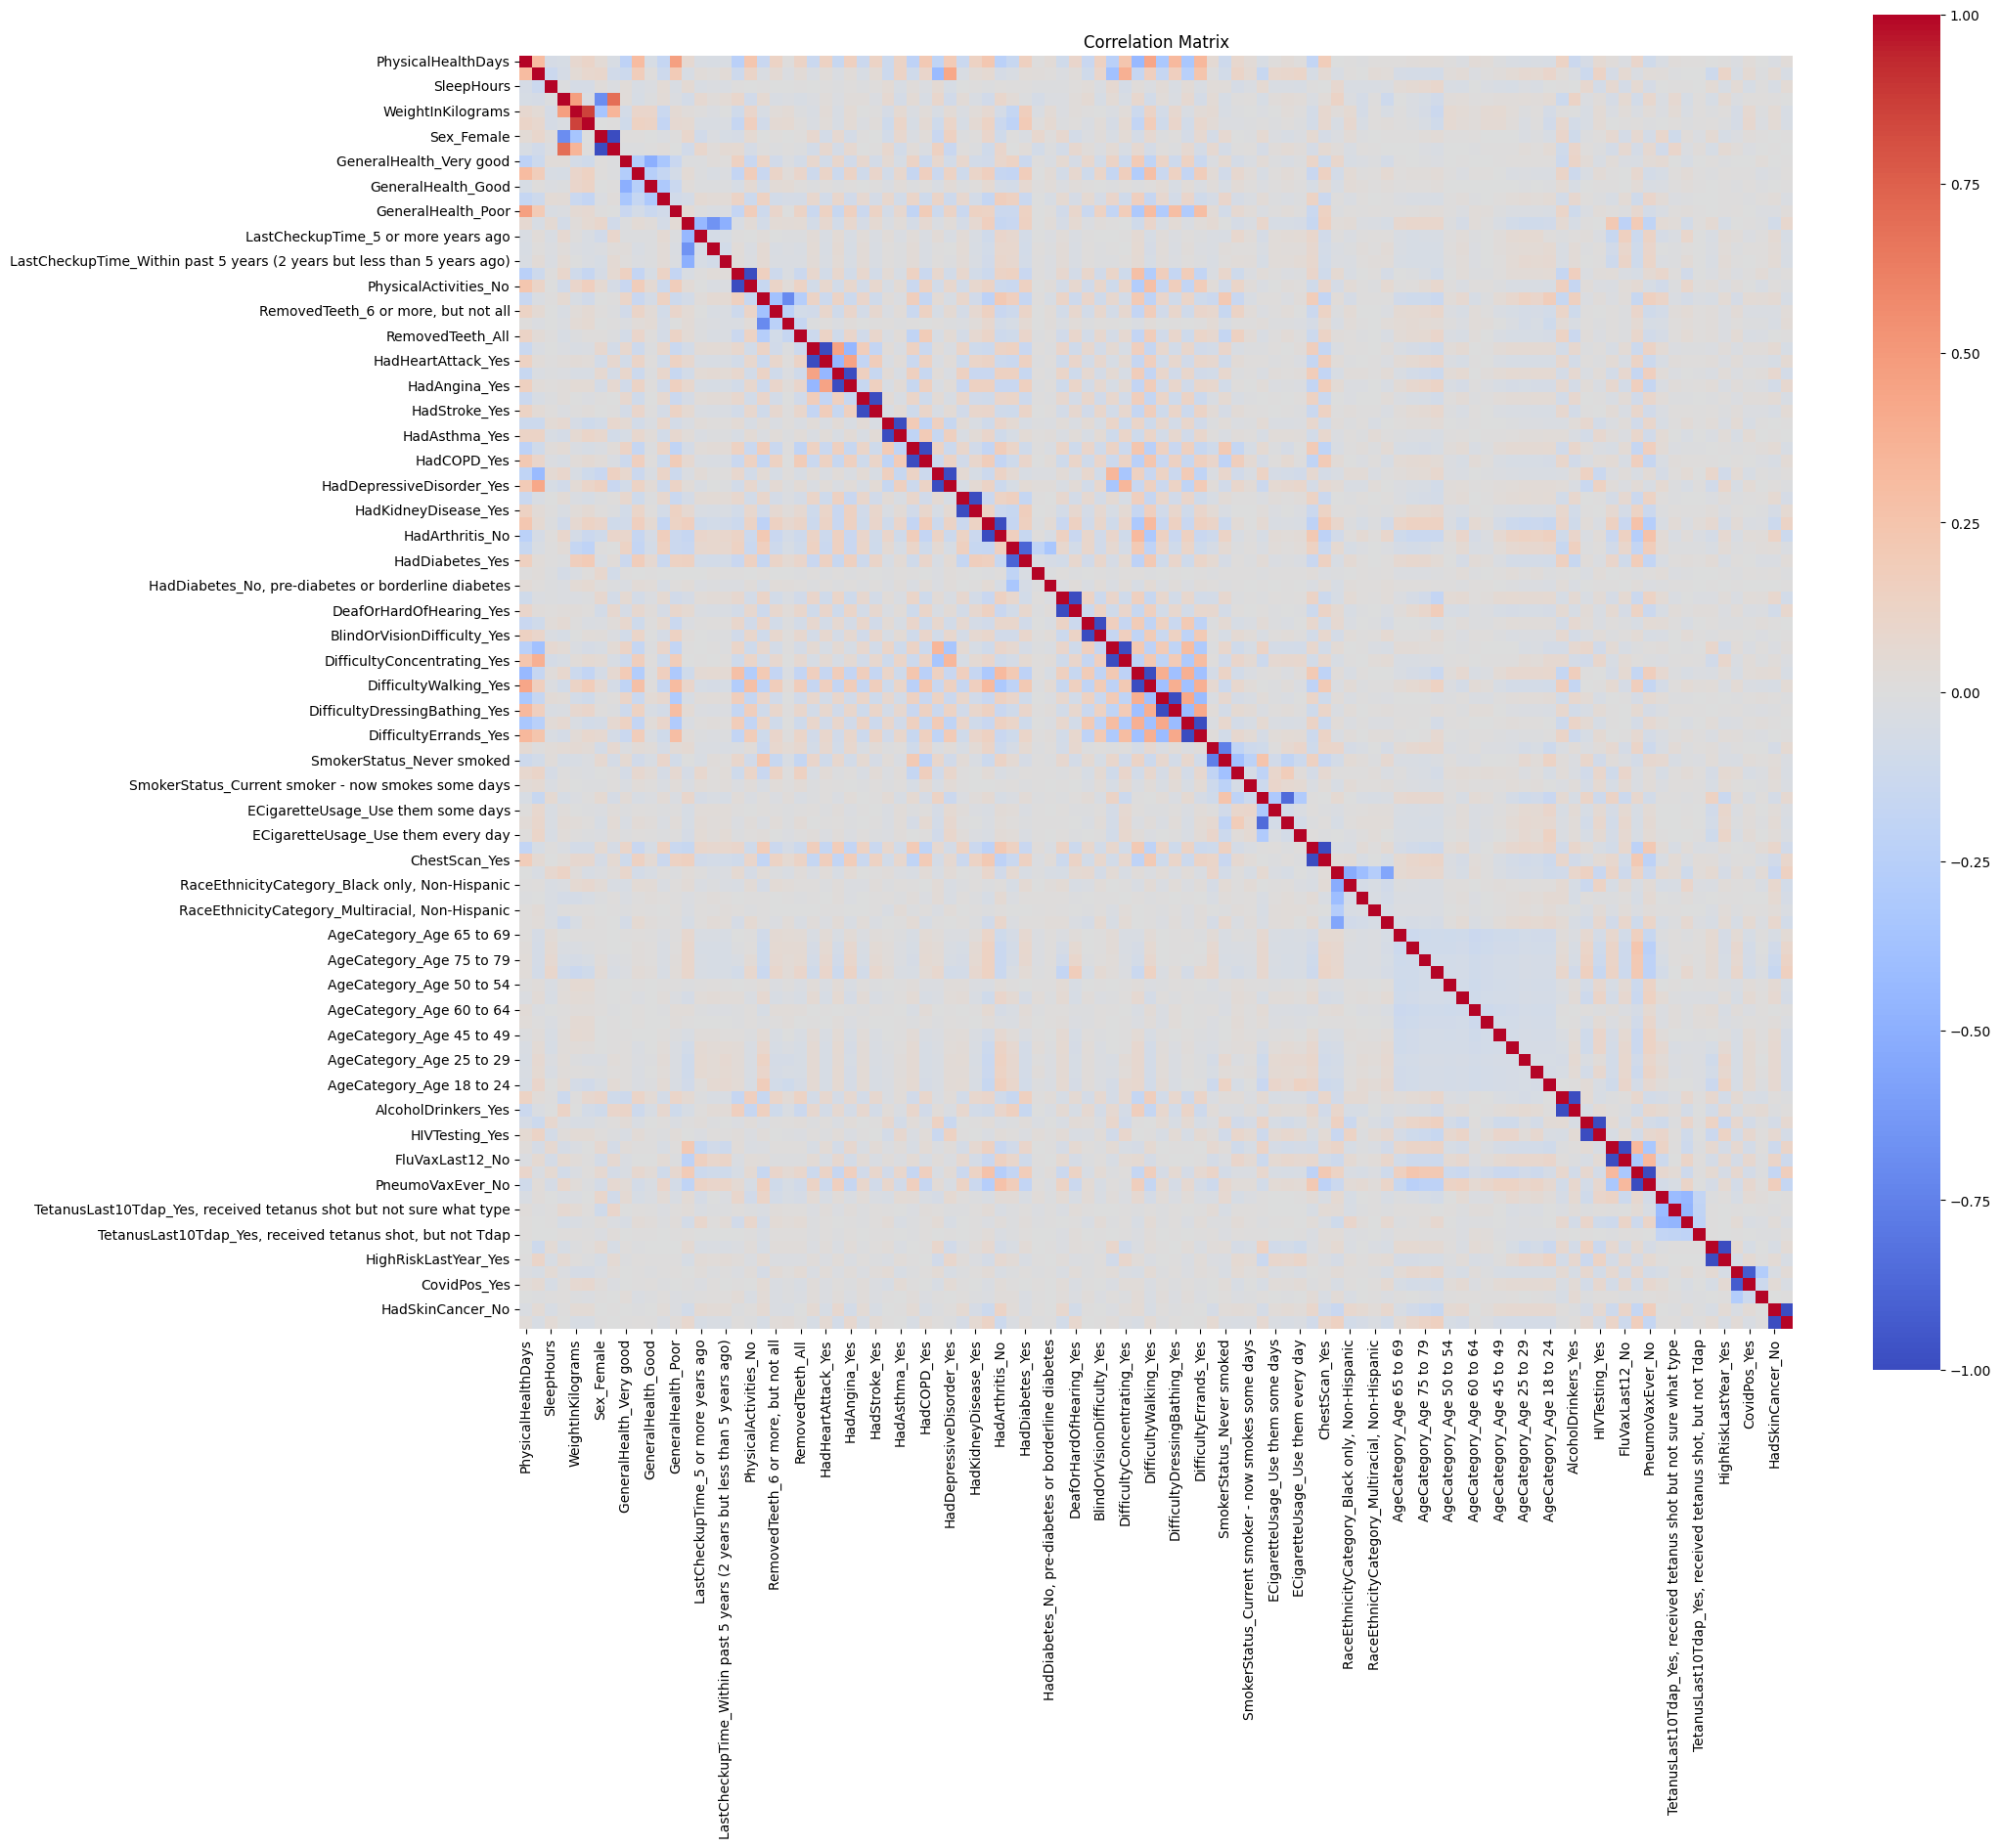

In [13]:
correlation_matrix = hd_22_nn.corr()

# Plot heatmap
plt.figure(figsize=(21, 18))
sns.heatmap(
    correlation_matrix,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix")
plt.show()

In [14]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    inner = np.abs((y_true - y_pred) / y_true)
    return np.mean(inner) * 100
    

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import math

Ridge
MSE: 0.0368
R^2: 0.0781


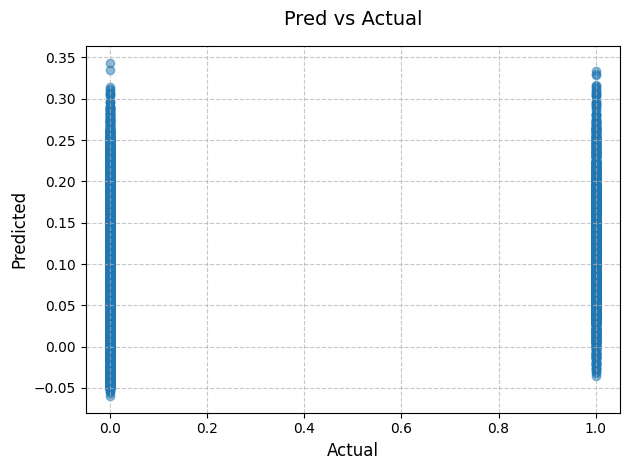

In [15]:
X = hd_22_nn.drop(["HighRiskLastYear_No", "HighRiskLastYear_Yes"], axis=1)
y = hd_22_nn["HighRiskLastYear_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ridge")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Pred vs Actual', fontsize=14, pad=15)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Random Forest
MSE: 0.0416
R^2: -0.0434


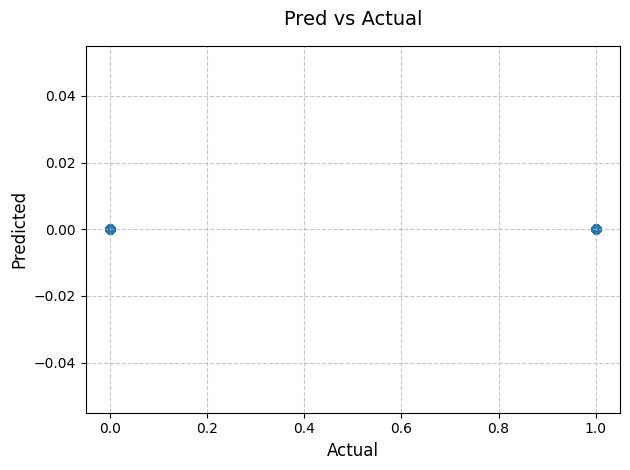

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Pred vs Actual', fontsize=14, pad=15)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

SVC Linear
MSE: 0.0416
R^2: -0.0434


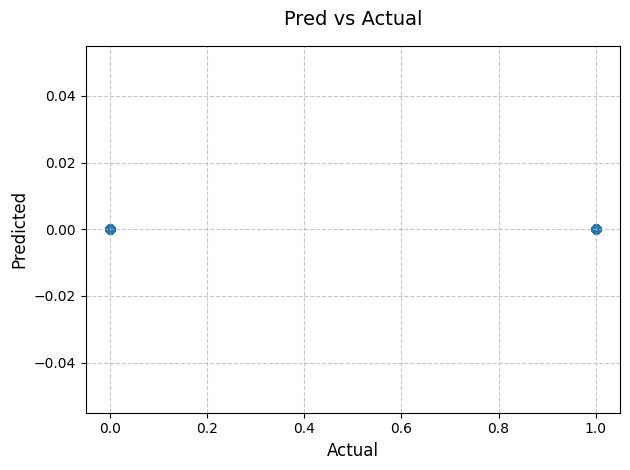

In [17]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(dual=False)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVC Linear")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Pred vs Actual', fontsize=14, pad=15)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
svm_classifier = SVC(
    kernel='rbf',
    cache_size=2000,  # Increase cache size if you have RAM available
    random_state=42,
    decision_function_shape='ovo'  # Can be faster than 'ovr' for multiclass
)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVC RBF")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Pred vs Actual', fontsize=14, pad=15)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

MLP
MSE: 0.0416
R^2: -0.0434


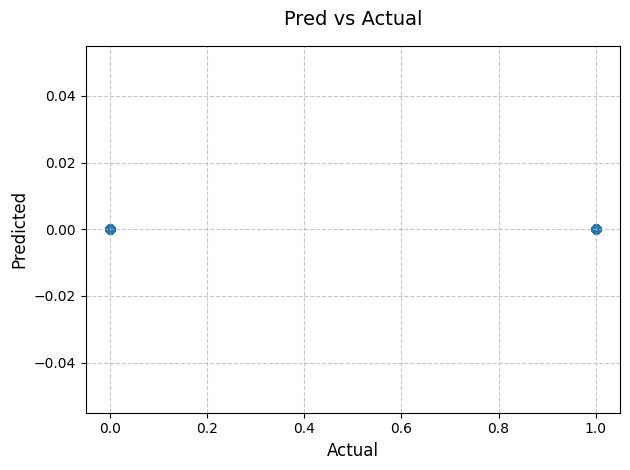

In [68]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             
    solver='adam',                 
    max_iter=1000,                
    random_state=42,
    learning_rate_init=0.001,     
    batch_size=32,                
    early_stopping=True,          
    validation_fraction=0.1       
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MLP")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Pred vs Actual', fontsize=14, pad=15)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Poisson Reg
MSE: 0.0392
R^2: 0.0161


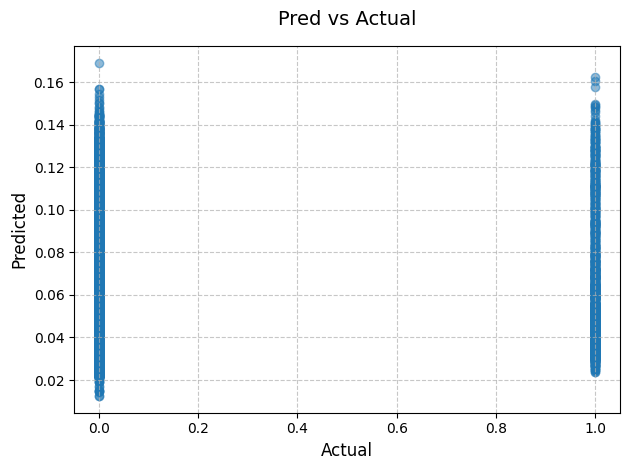

In [69]:
from sklearn.linear_model import PoissonRegressor

poisson_model = PoissonRegressor(alpha=1.0, max_iter=30000)
poisson_model.fit(X_train, y_train)
y_pred = poisson_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Poisson Reg")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

plt.scatter(y_test, y_pred, alpha=0.5)

plt.title('Pred vs Actual', fontsize=14, pad=15)
plt.xlabel('Actual', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Another one

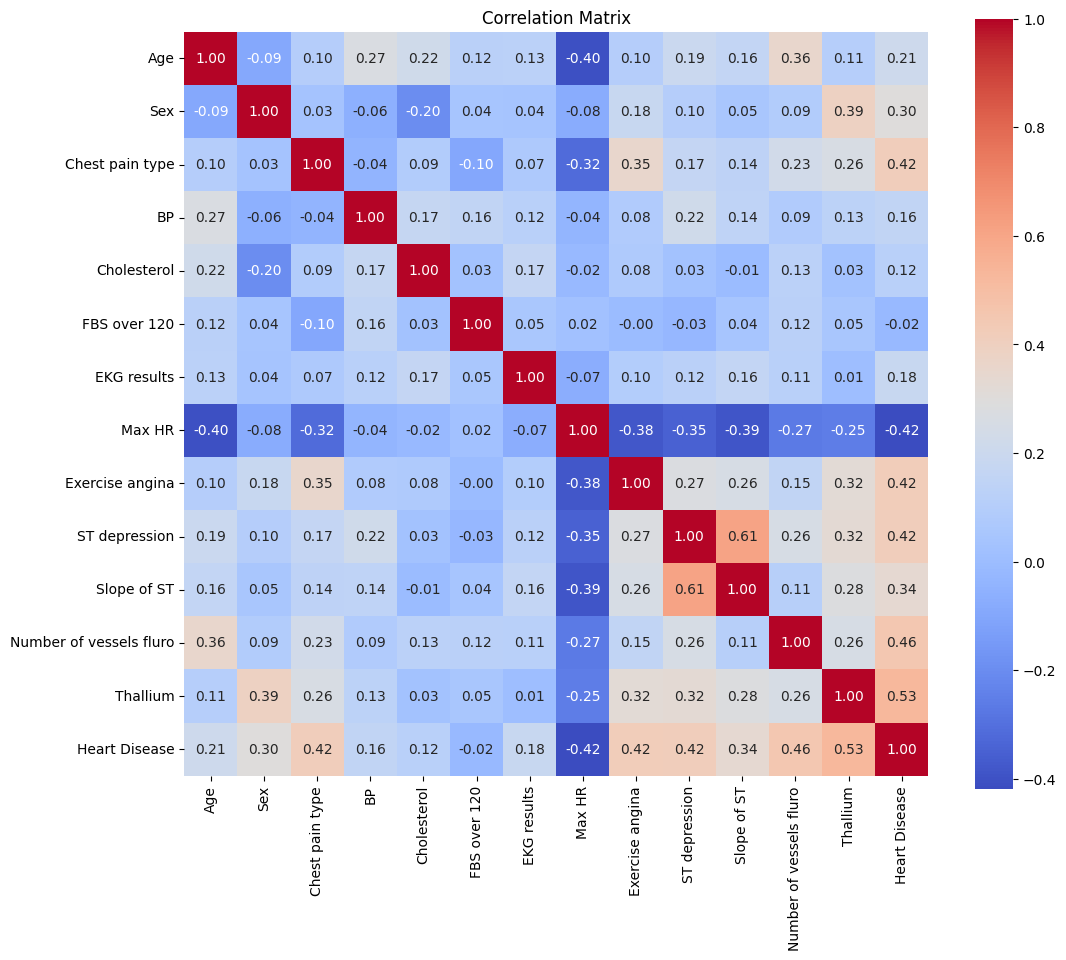

In [16]:
df = pd.read_csv("./data/Heart_Disease_Prediction/Heart_Disease_Prediction.csv")
df["Heart Disease"] = df["Heart Disease"] == "Presence"
# df["Cholesterol"] = df["Cholesterol"]/100
# df["BP"] = df["BP"]/100
# df["Max HR"] = df["Max HR"]/100

correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix")
plt.show()

In [17]:
df = df.drop("Max HR", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Exercise angina          270 non-null    int64  
 8   ST depression            270 non-null    float64
 9   Slope of ST              270 non-null    int64  
 10  Number of vessels fluro  270 non-null    int64  
 11  Thallium                 270 non-null    int64  
 12  Heart Disease            270 non-null    bool   
dtypes: bool(1), float64(1), int64(11)
memory usage: 25.7 KB


In [19]:
df.head(15)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,0,2.4,2,3,3,True
1,67,0,3,115,564,0,2,0,1.6,2,0,7,False
2,57,1,2,124,261,0,0,0,0.3,1,0,7,True
3,64,1,4,128,263,0,0,1,0.2,2,1,7,False
4,74,0,2,120,269,0,2,1,0.2,1,1,3,False
5,65,1,4,120,177,0,0,0,0.4,1,0,7,False
6,56,1,3,130,256,1,2,1,0.6,2,1,6,True
7,59,1,4,110,239,0,2,1,1.2,2,1,7,True
8,60,1,4,140,293,0,2,0,1.2,2,2,7,True
9,63,0,4,150,407,0,2,0,4.0,2,3,7,True


In [26]:
X = df.drop("Heart Disease", axis=1)
y = df["Heart Disease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Ridge")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

###################

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Random Forest")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

###################

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(dual=False)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("SVC Linear")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

#####################

svm_classifier = SVC(
    kernel='rbf'
)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("SVC RBF")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

################

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             
    solver='adam',                 
    max_iter=1000,
    learning_rate_init=0.001,     
    batch_size=32,                
    early_stopping=True,          
    validation_fraction=0.1       
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("MLP")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

################

from sklearn.linear_model import PoissonRegressor

poisson_model = PoissonRegressor(alpha=1.0, max_iter=30000)
poisson_model.fit(X_train, y_train)
y_pred = poisson_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Poisson Reg")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))


Ridge
MSE: 0.1157
R^2: 0.5130

Random Forest
MSE: 0.1111
R^2: 0.5325

SVC Linear
MSE: 0.1111
R^2: 0.5325

SVC RBF
MSE: 0.3333
R^2: -0.4026

MLP
MSE: 0.2778
R^2: -0.1688

Poisson Reg
MSE: 0.1530
R^2: 0.3560


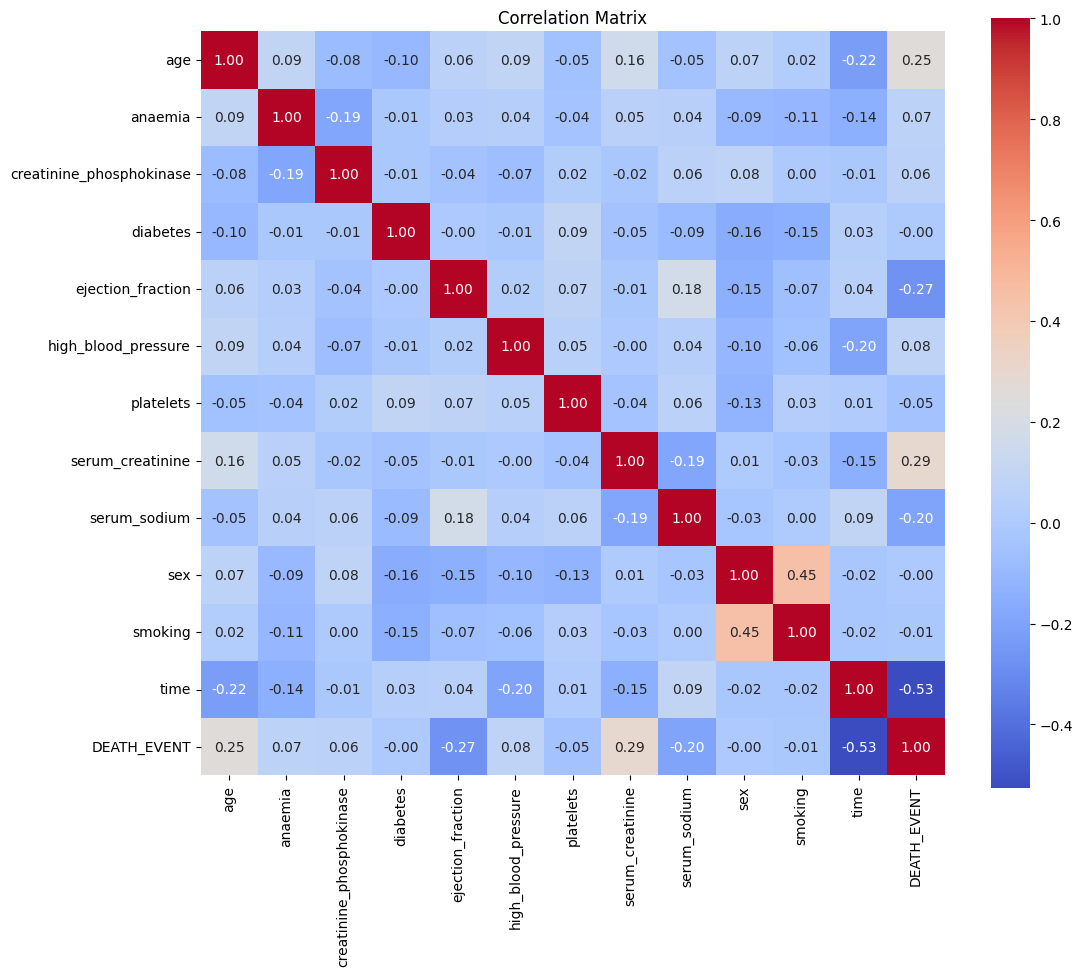

In [20]:
df = pd.read_csv("./data/Heart_Failure_Prediction/heart_failure_clinical_records_dataset.csv")
# df["platelets"] = df["platelets"]/100000
df.dtypes

correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Matrix")
plt.show()

In [21]:
df = df.drop("time", axis=1)
df.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 28.2 KB


In [23]:
df["age"].unique()

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

In [30]:
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Ridge")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

###################

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Random Forest")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

###################

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

svm_classifier = LinearSVC(dual=False)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("SVC Linear")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

#####################

svm_classifier = SVC(
    kernel='rbf'
)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("SVC RBF")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

################

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50),  
    activation='relu',             
    solver='adam',                 
    max_iter=1000,
    learning_rate_init=0.001,     
    batch_size=32,                
    early_stopping=True,          
    validation_fraction=0.1       
)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("MLP")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))

################

from sklearn.linear_model import PoissonRegressor

poisson_model = PoissonRegressor(alpha=1.0, max_iter=30000)
poisson_model.fit(X_train, y_train)
y_pred = poisson_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print()
print("Poisson Reg")
print("MSE: {:.4f}".format(mse))
print("R^2: {:.4f}".format(r2))


Ridge
MSE: 0.2271
R^2: 0.0658

Random Forest
MSE: 0.3667
R^2: -0.5086

SVC Linear
MSE: 0.4167
R^2: -0.7143

SVC RBF
MSE: 0.4167
R^2: -0.7143

MLP
MSE: 0.4167
R^2: -0.7143

Poisson Reg
MSE: 0.2195
R^2: 0.0971


In [25]:
df_feather = pd.read_feather("heart_2022_no_nans_preprocessed.feather")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1
